<a href="https://colab.research.google.com/github/Grashch/Data-science/blob/main/Weather_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [173]:
data = pd.read_csv('/content/Weather Training Data.csv')
data.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


In [174]:
data.shape

(99516, 23)

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [176]:
data['RainToday'].value_counts(dropna=False)

,count
RainToday,
No,76481
Yes,22056
NaN,979


In [177]:
data = data.dropna(subset=['RainToday'])

In [178]:
feature_n = [col for col in data.columns if data[col].dtype == 'float64']
for col in feature_n:
  data[col] = data[col].fillna(data[col].median())


In [179]:
feature_c = [col for col in data.columns if data[col].dtype == 'object']
feature_c.remove('row ID')
feature_c


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [180]:
encoder = OneHotEncoder()
encoder.fit(data[feature_c])

OneHotEncoder()

In [181]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [182]:
feature_c_ohe = []
for i, feature in enumerate(feature_c):
  feature_c_ohe.extend([f'{feature}:{value}' for value in encoder.categories_[i]])


In [183]:
data.loc[:, feature_c_ohe] = encoder.transform(data[feature_c]).toarray()
data

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindDir3pm:SE,WindDir3pm:SSE,WindDir3pm:SSW,WindDir3pm:SW,WindDir3pm:W,WindDir3pm:WNW,WindDir3pm:WSW,WindDir3pm:nan,RainToday:No,RainToday:Yes
0,Row0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Row1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Row2,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Row3,Albury,14.6,29.7,0.2,4.8,8.5,WNW,56.0,W,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Row4,Albury,7.7,26.7,0.0,4.8,8.5,W,35.0,SSE,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Row101816,Uluru,8.0,20.7,0.0,4.8,8.5,ESE,41.0,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99512,Row101817,Uluru,3.5,21.8,0.0,4.8,8.5,E,31.0,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99513,Row101818,Uluru,2.8,23.4,0.0,4.8,8.5,E,31.0,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99514,Row101819,Uluru,3.6,25.3,0.0,4.8,8.5,NNW,22.0,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [184]:
features = feature_n + feature_c_ohe
features
X = data[features]
y = data['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, stratify=y)


In [185]:
%%time
forest = RandomForestClassifier(n_estimators=500, n_jobs=4, oob_score=True)
forest.fit(X_train, y_train)

CPU times: user 3min 18s, sys: 2 s, total: 3min 20s
Wall time: 2min 1s


RandomForestClassifier(n_estimators=500, n_jobs=4, oob_score=True)

In [186]:
def get_metrics(forest):
  result = []
  y_pred = forest.predict_proba(X_train)
  accuracy = accuracy_score(y_train, y_pred.argmax(axis=1))
  f1 = f1_score(y_train, y_pred.argmax(axis=1))
  roc_auc = roc_auc_score(y_train, y_pred[:,1])
  result.append(['Train', accuracy, f1, roc_auc])
  y_pred = forest.predict_proba(X_test)
  accuracy = accuracy_score(y_test, y_pred.argmax(axis=1))
  f1 = f1_score(y_test, y_pred.argmax(axis=1))
  roc_auc = roc_auc_score(y_test, y_pred[:,1])
  result.append(['Test', accuracy, f1, roc_auc])
  return pd.DataFrame(columns=['Type', 'accuracy', 'f1', 'roc_auc'], data=result)

In [187]:
get_metrics(forest)

,Type,accuracy,f1,roc_auc
0,Train,0.999986,0.999970,0.999978
1,Test,0.856464,0.608243,0.883458


In [188]:
forest.oob_decision_function_[:3,:]

array([[0.97701149, 0.02298851],
       [0.59      , 0.41      ],
       [0.9744898 , 0.0255102 ]])

In [189]:
print(f'OOB: {roc_auc_score(y_train, forest.oob_decision_function_[:,1])}')


OOB: 0.8847642894393329


In [190]:
forest.estimators_[:3]

[DecisionTreeClassifier(max_features='sqrt', random_state=1265143278),
 DecisionTreeClassifier(max_features='sqrt', random_state=1268631437),
 DecisionTreeClassifier(max_features='sqrt', random_state=560795080)]

In [191]:
forest.estimators_[1].predict_proba(X_train)[:3,:]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.]])

In [192]:
pred_train = np.hstack([estimator.predict_proba(X_train)[:,1].reshape((-1, 1)) for estimator in forest.estimators_])
pred_test = np.hstack([estimator.predict_proba(X_test)[:,1].reshape((-1, 1)) for estimator in forest.estimators_])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: U

In [193]:
pred_train.shape, pred_test.shape

((73902, 500), (24635, 500))

In [194]:
roc_auc = {'Train' : [], 'Test' : []}
for i in range(1, pred_train.shape[1]):
  roc_auc['Train'].append(roc_auc_score(y_train, pred_train[:,:i].mean(axis=1)))
for i in range(1, pred_test.shape[1]):
  roc_auc['Test'].append(roc_auc_score(y_test, pred_test[:,:i].mean(axis=1)))

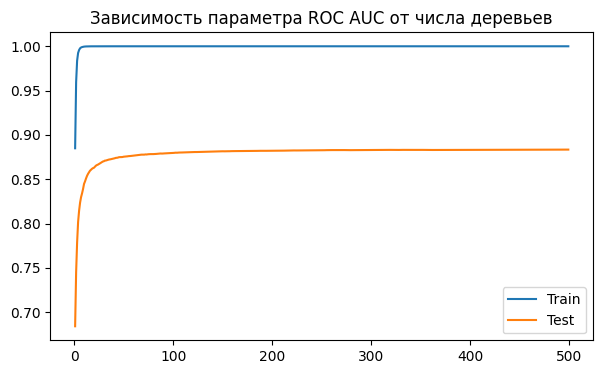

In [198]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, pred_train.shape[1]), roc_auc['Train'], label='Train')
plt.plot(range(1, pred_test.shape[1]), roc_auc['Test'], label='Test')
plt.title('Зависимость параметра ROC AUC от числа деревьев')
# plt.xlabel('Число деревьев')
# plt.ylabel('ROC AUC')
plt.legend()
plt.show()